# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 619


['chonchi',
 'waitangi',
 'port-aux-francais',
 'saint-philippe',
 'grytviken',
 'kushiro',
 'geraldton',
 'blackmans bay',
 'olonkinbyen',
 'nzerekore',
 'stutterheim',
 "la'ie",
 'kodiak',
 'taroa',
 'bredasdorp',
 'naberera',
 'toliara',
 'nchelenge',
 'mahaddayweyne',
 'mount pearl',
 'katsuren-haebaru',
 'port moresby',
 'kaspiyskiy',
 'fort irwin',
 'palikir - national government center',
 'aras-asan',
 'iskateley',
 'adamstown',
 'faya-largeau',
 'ushuaia',
 'kuanda',
 'polyarnyy',
 'guerrero negro',
 'nova sintra',
 'alesund',
 'walvis bay',
 'albany',
 'edinburgh of the seven seas',
 'pasil',
 'margaret river',
 'isla mujeres',
 'ginir',
 'puerto natales',
 'bethel',
 "kapa'a",
 'nemuro',
 'iqaluit',
 'necochea',
 'itoman',
 'rawson',
 'bealanana',
 'codrington',
 'tiksi',
 'invercargill',
 'stanley',
 'quepos',
 'tacuarembo',
 'chu',
 'hithadhoo',
 'belozersk',
 'gisborne',
 'howrah',
 'sweet home',
 'tucuma',
 'cockburn town',
 'yellowknife',
 'montenero di bisaccia',
 'jaya

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#     finally:
#         break   
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# city_weather = requests.get(city_url)
# city_json = city_weather.json()
#city_json


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | kushiro
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | nzerekore
Processing Record 11 of Set 1 | stutterheim
Processing Record 12 of Set 1 | la'ie
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | taroa
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | naberera
Processing Record 17 of Set 1 | toliara
Processing Record 18 of Set 1 | nchelenge
Processing Record 19 of Set 1 | mahaddayweyne
Processing Record 20 of Set 1 | mount pearl
Processing Record 21 of Set 1 | katsuren-haebaru
Processing Record 22 of Set 1 | port moresby
Proces

Processing Record 44 of Set 4 | odessa
Processing Record 45 of Set 4 | vadso
Processing Record 46 of Set 4 | at-bashi
Processing Record 47 of Set 4 | boqueirao
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | san antonio de pale
Processing Record 0 of Set 5 | oualidia
City not found. Skipping...
Processing Record 1 of Set 5 | mandalgovi
Processing Record 2 of Set 5 | valparaiso
Processing Record 3 of Set 5 | sao mateus do sul
Processing Record 4 of Set 5 | afaahiti
Processing Record 5 of Set 5 | dikwa
Processing Record 6 of Set 5 | las heras
Processing Record 7 of Set 5 | olovyannaya
Processing Record 8 of Set 5 | andergrove
Processing Record 9 of Set 5 | lagunas
Processing Record 10 of Set 5 | namibe
Processing Record 11 of Set 5 | toga village
City not found. Skipping...
Processing Record 12 of Set 5 | gunjur
Processing Record 13 of Set 5 | port alfred
Processing Record 14 of Set 5 | palmer
Processing Record 15 of Set 5 | chibougamau
Processing Record 16 of Set 

Processing Record 32 of Set 8 | vanino
Processing Record 33 of Set 8 | fort st. john
Processing Record 34 of Set 8 | ha'il
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | san pedro
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | kyaikkami
Processing Record 39 of Set 8 | onguday
Processing Record 40 of Set 8 | talpa de allende
Processing Record 41 of Set 8 | kavaratti
Processing Record 42 of Set 8 | tres arroyos
Processing Record 43 of Set 8 | chernomorskoye
Processing Record 44 of Set 8 | boulder city
Processing Record 45 of Set 8 | katima mulilo
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | prince george
Processing Record 48 of Set 8 | lemvig
Processing Record 49 of Set 8 | ar ruseris
Processing Record 0 of Set 9 | tol'yatti
Processing Record 1 of Set 9 | egilsstadir
Processing Record 2 of Set 9 | sola
Processing Record 3 of Set 9 | floro
Processing Record 4 of Set 9 | vila franca do campo
Processing Record 5 of Se

Processing Record 18 of Set 12 | port-cartier
Processing Record 19 of Set 12 | nantucket
Processing Record 20 of Set 12 | taghazout
Processing Record 21 of Set 12 | eyl
Processing Record 22 of Set 12 | zaozersk
Processing Record 23 of Set 12 | kataba
Processing Record 24 of Set 12 | roma
Processing Record 25 of Set 12 | ta`u
Processing Record 26 of Set 12 | alotau
City not found. Skipping...
Processing Record 27 of Set 12 | ekibastuz
Processing Record 28 of Set 12 | kutum
Processing Record 29 of Set 12 | puerto baquerizo moreno
Processing Record 30 of Set 12 | imperatriz
Processing Record 31 of Set 12 | strathalbyn
Processing Record 32 of Set 12 | nagqu
Processing Record 33 of Set 12 | tajerouine
Processing Record 34 of Set 12 | brookings
Processing Record 35 of Set 12 | choyr
Processing Record 36 of Set 12 | zahedan
Processing Record 37 of Set 12 | jamjamal
Processing Record 38 of Set 12 | tandil
Processing Record 39 of Set 12 | tahe
Processing Record 40 of Set 12 | ashburton
Processi

[{'City': 'chonchi',
  'Lat': -42.6128,
  'Lng': -73.8092,
  'Max Temp': 9.51,
  'Humidity': 97,
  'Cloudiness': 68,
  'Wind Speed': 1.23,
  'Country': 'CL',
  'Date': 1688078087},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 11.57,
  'Humidity': 93,
  'Cloudiness': 94,
  'Wind Speed': 4.47,
  'Country': 'NZ',
  'Date': 1688078087},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 2.02,
  'Humidity': 63,
  'Cloudiness': 97,
  'Wind Speed': 17.1,
  'Country': 'TF',
  'Date': 1688078087},
 {'City': 'saint-philippe',
  'Lat': -21.3585,
  'Lng': 55.7679,
  'Max Temp': 17.77,
  'Humidity': 63,
  'Cloudiness': 24,
  'Wind Speed': 5.15,
  'Country': 'RE',
  'Date': 1688078087},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': -6.15,
  'Humidity': 77,
  'Cloudiness': 18,
  'Wind Speed': 4.79,
  'Country': 'GS',
  'Date': 1688078088},
 {'City': 'kushiro',
  'Lat': 42.975,
  'Lng': 144.3747,
  'Max Temp': 19.5

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,9.51,97,68,1.23,CL,1688078087
1,waitangi,-43.9535,-176.5597,11.57,93,94,4.47,NZ,1688078087
2,port-aux-francais,-49.3500,70.2167,2.02,63,97,17.10,TF,1688078087
3,saint-philippe,-21.3585,55.7679,17.77,63,24,5.15,RE,1688078087
4,grytviken,-54.2811,-36.5092,-6.15,77,18,4.79,GS,1688078088


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,9.51,97,68,1.23,CL,1688078087
1,waitangi,-43.9535,-176.5597,11.57,93,94,4.47,NZ,1688078087
2,port-aux-francais,-49.3500,70.2167,2.02,63,97,17.10,TF,1688078087
3,saint-philippe,-21.3585,55.7679,17.77,63,24,5.15,RE,1688078087
4,grytviken,-54.2811,-36.5092,-6.15,77,18,4.79,GS,1688078088


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

#### Latitude Vs. Humidity

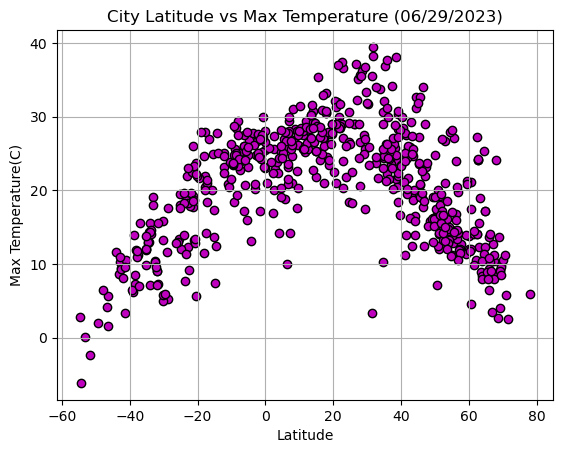

In [28]:
# Build scatter plot for latitude vs. temperature

x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y, color = 'm',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Max Temperature(C)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Max Temperature (06/29/2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

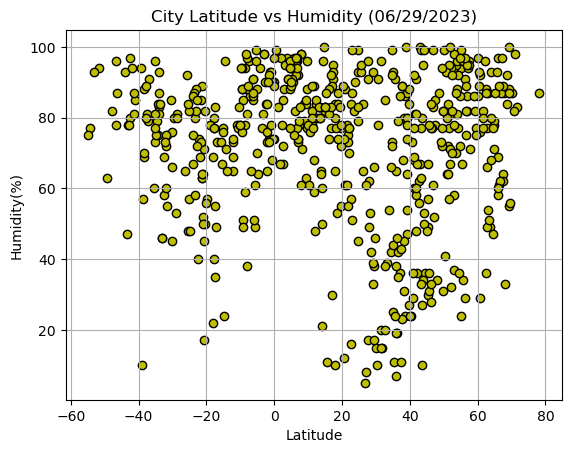

Latitude vs Humidity


In [21]:
# Build the scatter plots for latitude vs. humidity

x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y, color = 'y',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Humidity(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Humidity (06/29/2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()
print('Latitude vs Humidity')

#### Latitude Vs. Cloudiness

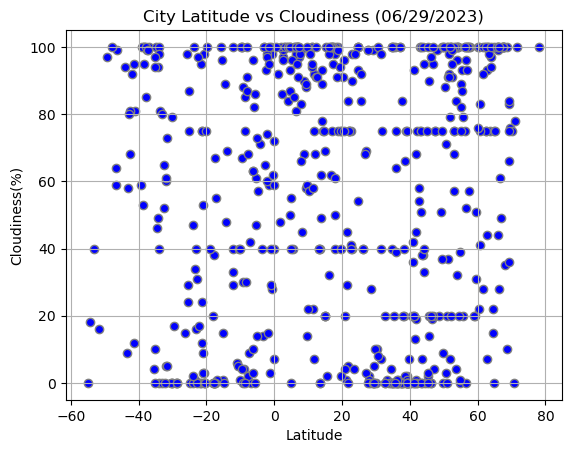

Latitude vs Cloudiness


In [27]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y, color = 'b',edgecolors = 'grey')

# Incorporate the other graph properties
plt.ylabel('Cloudiness(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Cloudiness (06/29/2023)')
plt.grid()

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()
print('Latitude vs Cloudiness')

#### Latitude vs. Wind Speed Plot

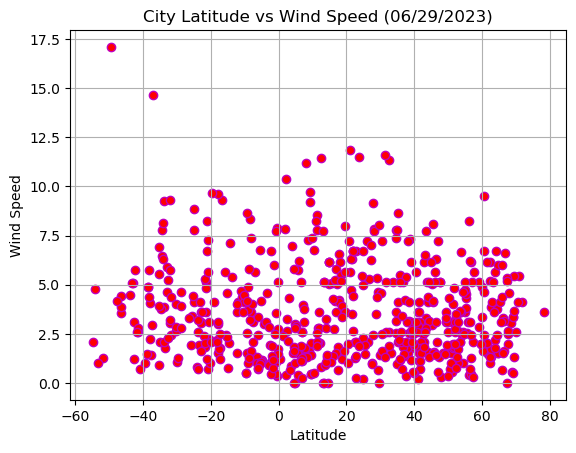

In [31]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y, color = 'r',edgecolors = 'm')


# Incorporate the other graph properties
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")
plt.title('City Latitude vs Wind Speed (06/29/2023)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


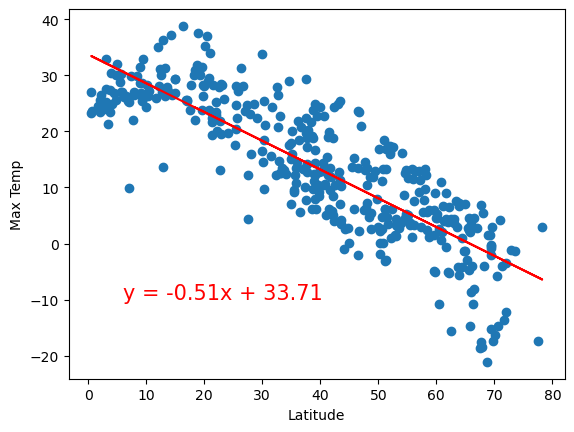

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


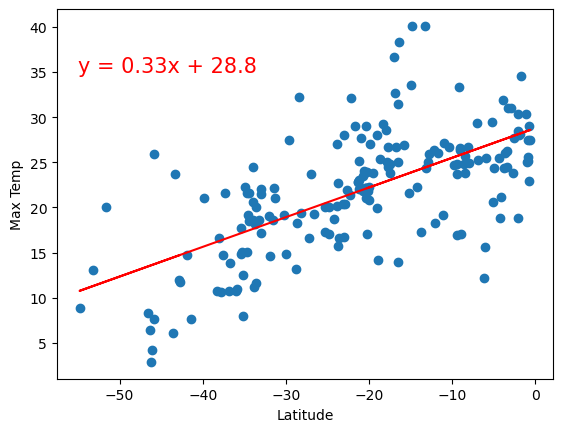

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


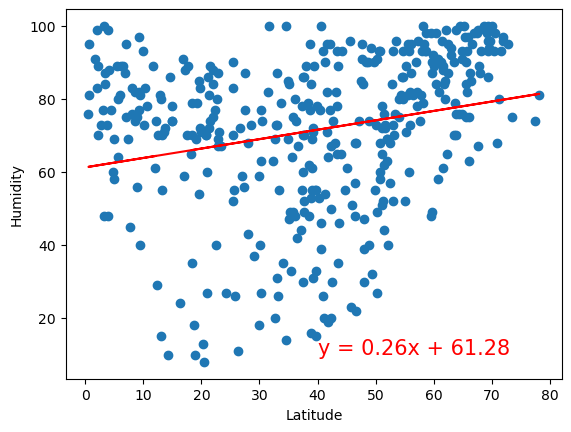

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


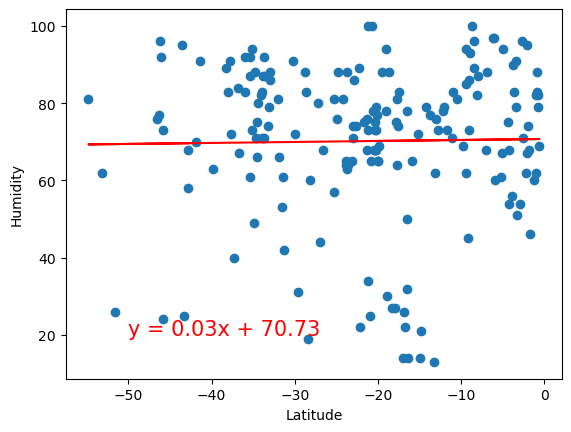

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


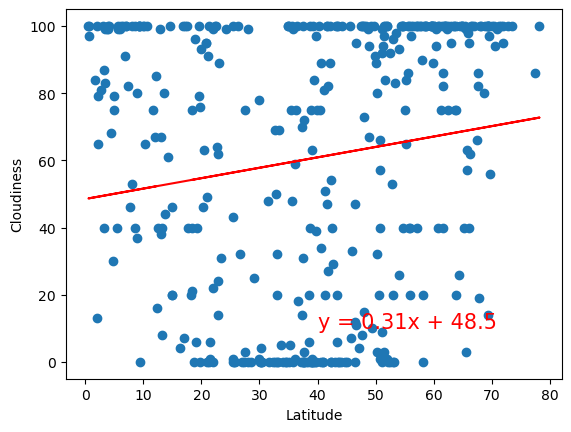

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


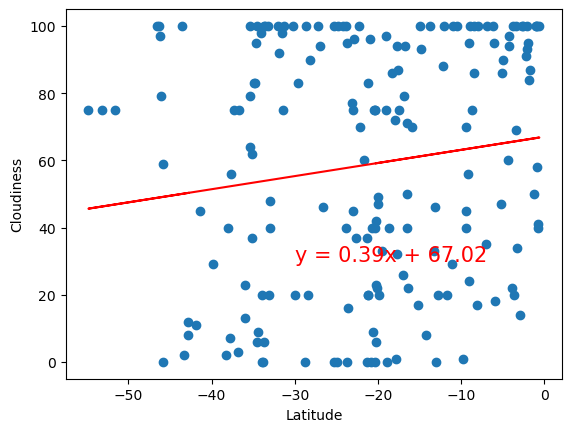

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


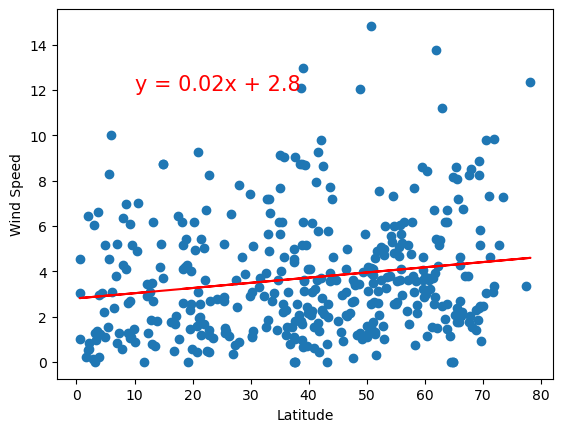

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


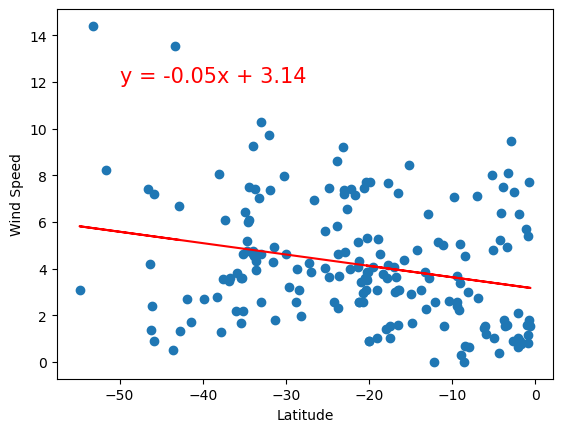

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE